In [1]:
# importing libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# importing data
df = pd.read_csv('data/unique_outages2.csv', parse_dates=['Start', 'Finish', 'file_name'])

df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Region              2271 non-null   object        
 1   NSP                 2271 non-null   object        
 2   Start               2271 non-null   datetime64[ns]
 3   Finish              2271 non-null   datetime64[ns]
 4   Network Asset       2271 non-null   object        
 5   Recall_Day_Hours    2271 non-null   float64       
 6   Recall_Night_Hours  2271 non-null   float64       
 7   Project Work?       2271 non-null   int64         
 8   Unplanned?          2271 non-null   int64         
 9   DNSP Aware?         2271 non-null   int64         
 10  Generator Aware?    2271 non-null   int64         
 11  Inter-Regional      2271 non-null   int64         
 12  Status_Description  2271 non-null   object        
 13  Status_Code         2271 non-null   object      

,Region,NSP,Start,Finish,Network Asset,Recall_Day_Hours,Recall_Night_Hours,Project Work?,Unplanned?,DNSP Aware?,Generator Aware?,Inter-Regional,Status_Description,Status_Code,Reason,Duration_Hours,Impact,file_name,Duration_Category,Asset Type
0,SA,ElectraNet,2030-08-05 07:30:00,2030-08-11 17:30:00,Tailem Bend - Tungkillo No.2 275 kV Line,6.0,12.0,0,0,0,0,0,Planned,SUBMIT,Maintenance,153.6,A credible contingency event during this plann...,2024-08-26,20.8+ hrs,Line
1,VIC,AusNet,2025-01-04 06:00:00,2025-01-04 16:00:00,Crowland - Bulgana 220 kV Line,60.0,0.0,0,0,0,0,0,Planned,SUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,9.5–11.0 hrs,Line
2,VIC,AusNet,2025-02-03 07:00:00,2025-02-03 17:00:00,MooraboolSydenham No.2 500 kV Line,4.0,0.0,0,0,0,0,0,Planned,RESUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,9.5–11.0 hrs,Line
3,VIC,AusNet,2025-02-03 06:00:00,2025-02-03 18:00:00,MooraboolSydenham No.1 500 kV Line,2.0,0.0,0,0,0,0,0,Planned,SUBMIT,Maintenance,12.0,A credible contingency event during this plann...,2024-08-26,11.0–14.0 hrs,Line
4,VIC,AusNet,2025-02-03 06:00:00,2025-02-03 16:00:00,MooraboolSydenham No.2 500 kV Line,4.0,0.0,0,0,0,0,0,Planned,SUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,9.5–11.0 hrs,Line


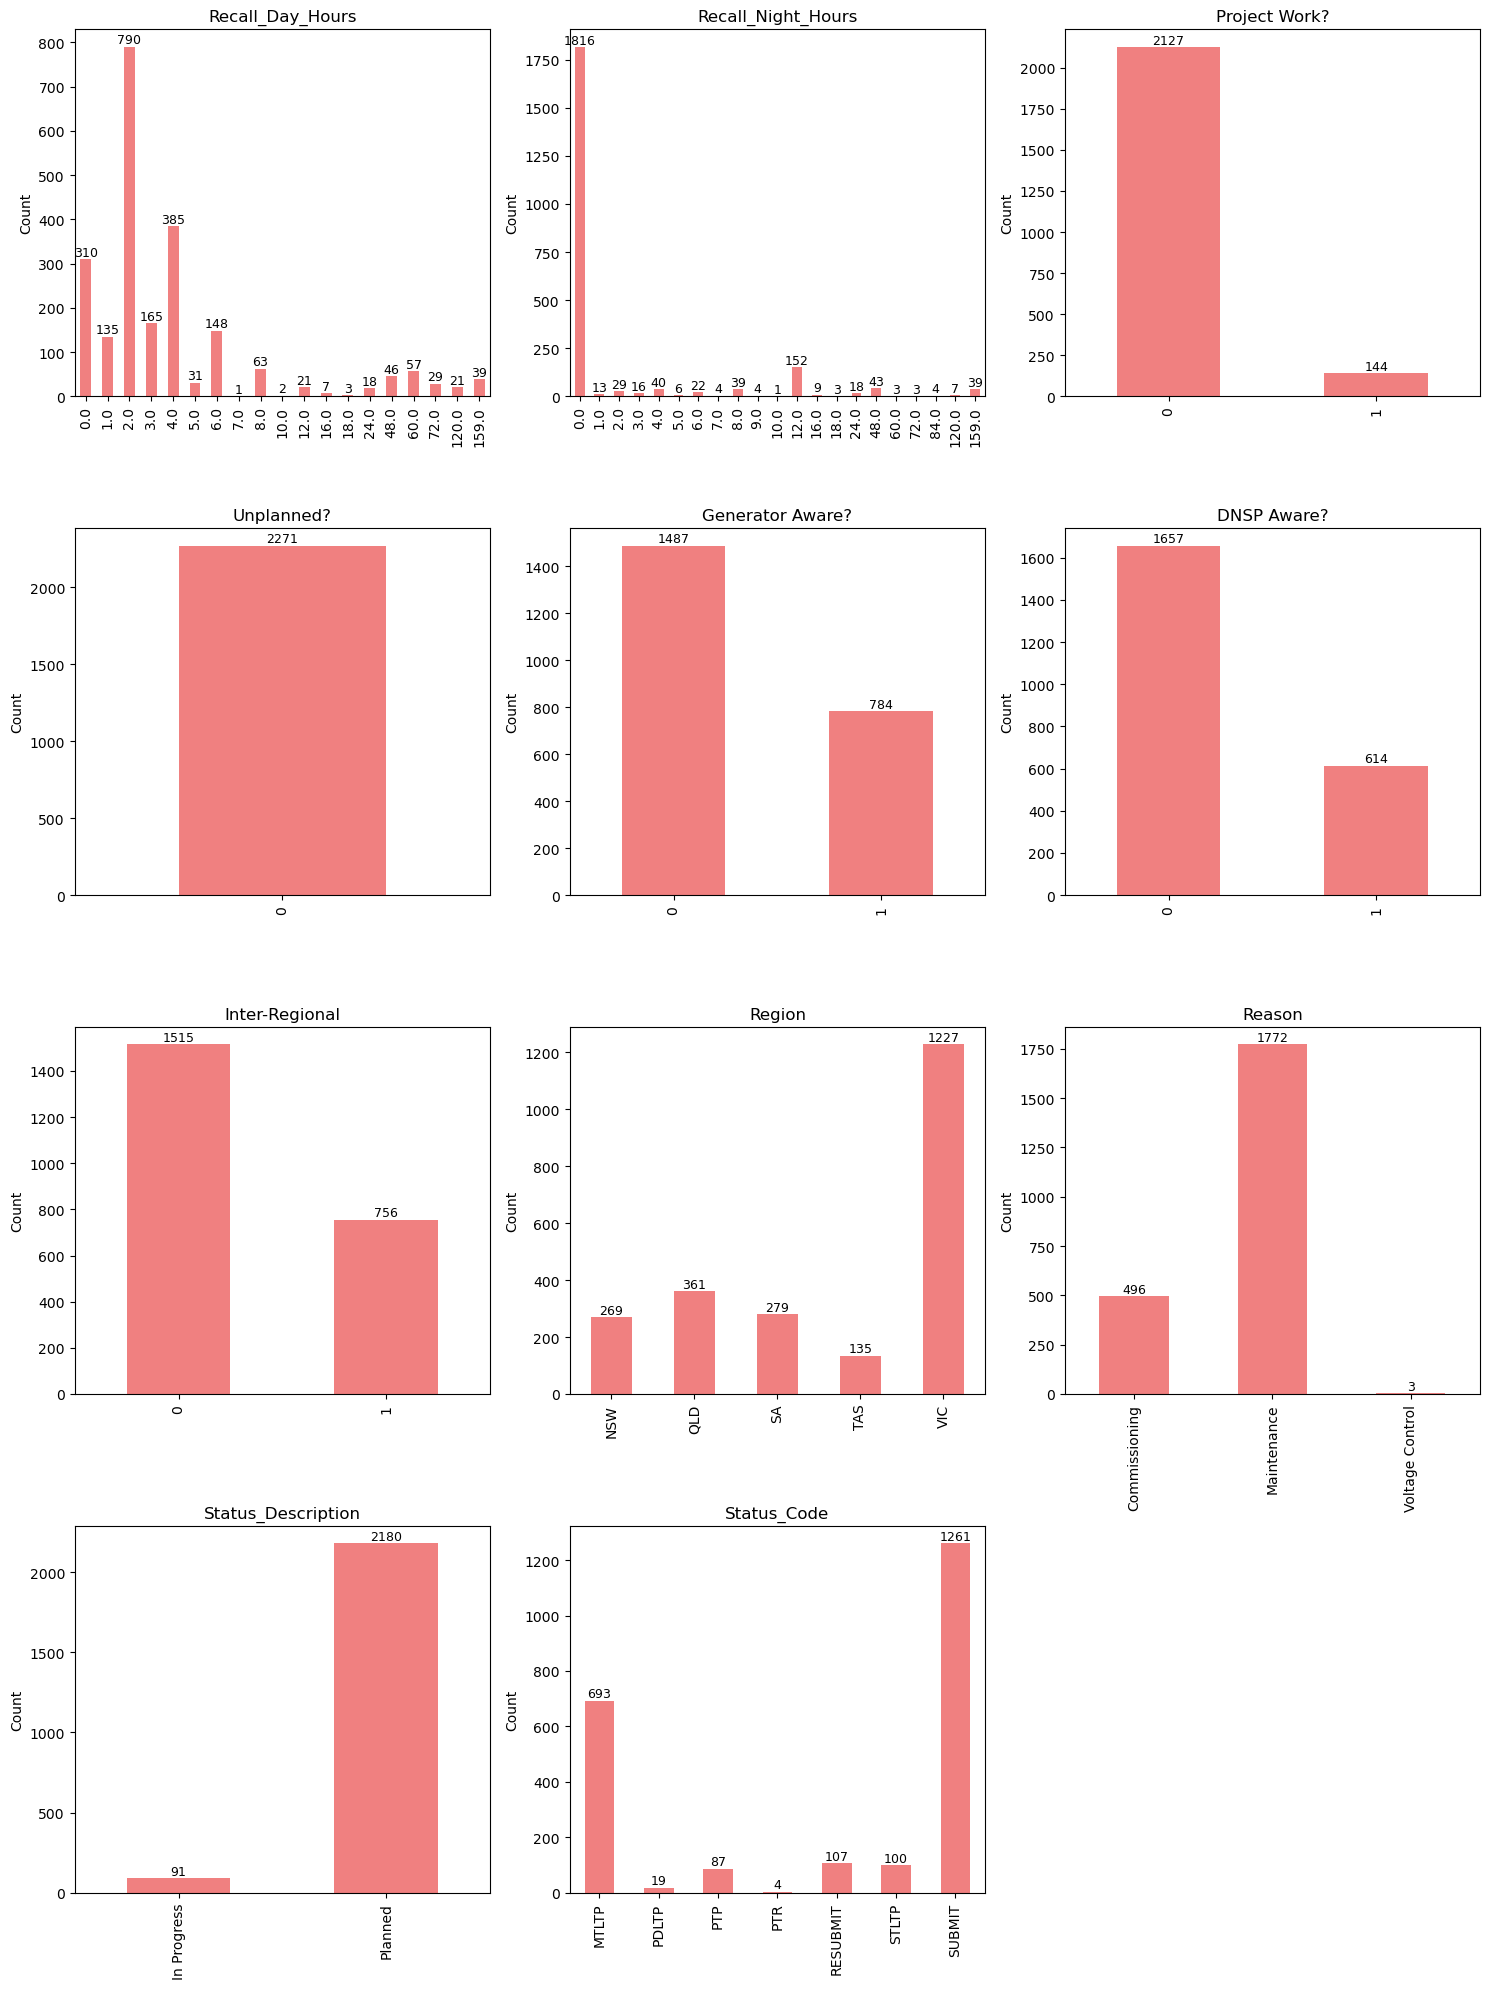

In [3]:
# Visualisation plots for the variables

bool_cols = ['Project Work?', 'Unplanned?', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional']
numeric_cols = ['Recall_Day_Hours', 'Recall_Night_Hours']
categorical_cols = ['Region', 'Reason', 'Status_Description', 'Status_Code']

# Combine all into one list
all_cols = numeric_cols + bool_cols + categorical_cols

n_cols = 3  # number of columns per row
n_rows = (len(all_cols) + n_cols - 1) // n_cols  # compute required rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(all_cols):
    ax = axes[idx]

    # Value counts for categorical/boolean/numeric columns
    counts = df[col].value_counts().sort_index()

    # Plot bar chart
    counts.plot(kind='bar', ax=ax, color='lightcoral')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

    # Add value labels on bars
    for i, value in enumerate(counts):
        ax.text(i, value + 1, str(int(value)), ha='center', va='bottom', fontsize=9, rotation=0)

# Remove any unused subplots
for j in range(len(all_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

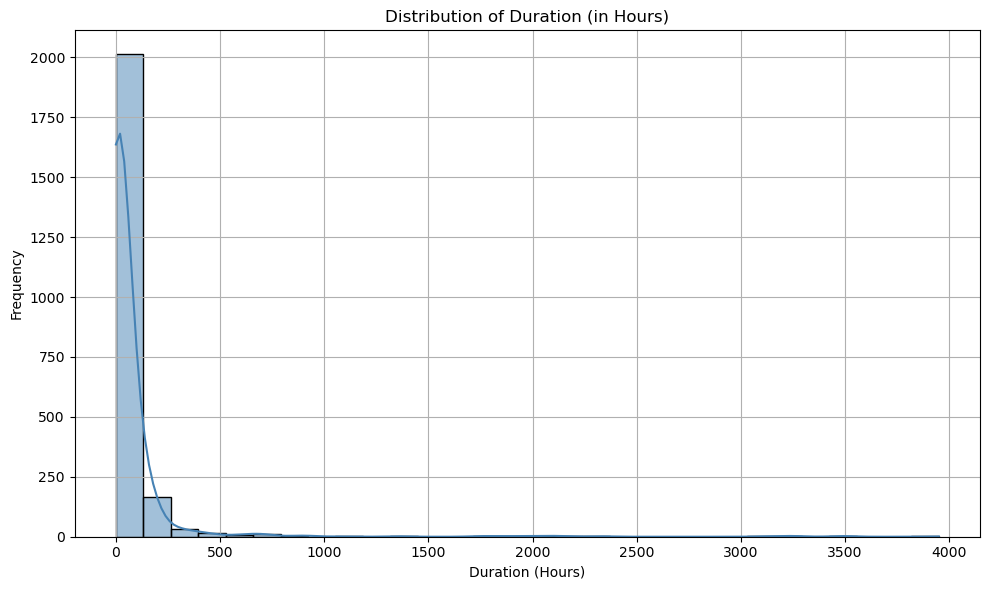

In [4]:
# Plot distribution of output variable 
# Drop NaNs
duration_data = df["Duration_Hours"].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(duration_data, bins=30, kde=True, color='steelblue')
plt.title("Distribution of Duration (in Hours)")
plt.xlabel("Duration (Hours)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()